In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib, collections, datetime, hashlib, os, re, time, sys
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
dot_pk_raw = pd.read_csv("./hk_data/dot/scan/result_pk.txt")
doh_pk_raw = pd.read_csv("./hk_data/doh/scan/result_pk.txt")
doq_pk_raw = pd.read_csv("./hk_data/doq/scan/result_pk.txt")
doh3_pk_raw = pd.read_csv("./hk_data/doh3/scan/result_pk.txt")

# dot_pk_raw = pd.read_csv("./hk_data/dot/scan/result_pk.txt")

In [3]:
dot_group_raw = pd.read_csv("./hk_data/dot/scan/result_group.txt")
doh_group_raw = pd.read_csv("./hk_data/doh/scan/result_group.txt")
doq_group_raw = pd.read_csv("./hk_data/doq/scan/result_group.txt")
doh3_group_raw = pd.read_csv("./hk_data/doh3/scan/result_group.txt")

# dot_pk_raw = pd.read_csv("./hk_data/dot/scan/result_pk.txt")

In [4]:
dot_pk_raw = pd.merge(dot_pk_raw,dot_group_raw,on=['ip'],how='left')
doh_pk_raw = pd.merge(doh_pk_raw,doh_group_raw,on=['ip'],how='left')
doq_pk_raw = pd.merge(doq_pk_raw,doq_group_raw,on=['ip'],how='left')
doh3_pk_raw = pd.merge(doh3_pk_raw,doh3_group_raw,on=['ip'],how='left')

In [6]:
def get_loc(pk_raw):
    x_list = []
    y_list = []
    for index, value in pk_raw['group'].value_counts().iteritems():
        if value == 1:
            break
        temp_raw = pk_raw[pk_raw['group']==index]
        temp_pk_num = len(temp_raw['pk_raw_hash'].value_counts())
        x_list.append(len(temp_raw))
        y_list.append(temp_pk_num)
        
#         if len(temp_raw) == temp_pk_num or len(temp_raw) == temp_pk_num + 1 or len(temp_raw) == temp_pk_num + 2:
#             print(index,value)
    
    return x_list, y_list

In [7]:
temp_raw = dot_pk_raw[dot_pk_raw['group']=='com.apple.dnssd-proxy (.*) Apple Inc. Networking']
temp_pk_num = len(temp_raw['pk_raw_hash'].value_counts())
temp_pk_num

3215

In [8]:
dot_x_list, dot_y_list = get_loc(dot_pk_raw)
doh_x_list, doh_y_list = get_loc(doh_pk_raw)
doq_x_list, doq_y_list = get_loc(doq_pk_raw)
doh3_x_list, doh3_y_list = get_loc(doh3_pk_raw)

In [9]:
doh_x_list, doh_y_list = get_loc(doh_pk_raw)


"."：点                   ","：像素点           "o"：圆形
"v"：朝下三角形   "^"：朝上三角形   "<"：朝左三角形   ">"：朝右三角形
"s"：正方形           "p"：五边星          "*"：星型
"h"：1号六角形     "H"：2号六角形 

"+"：+号标记      "x"：x号标记
"D"：菱形              "d"：小型菱形 
"|"：垂直线形         "_"：水平线形

In [11]:
key_share_num = 0
for index,value in doq_pk_raw['pk_raw_hash'].value_counts().iteritems():
    if value >1:
        key_share_num = key_share_num + value

print(doq_pk_raw['pk_raw_hash'].value_counts())
print(key_share_num)

print(key_share_num/3436*100)

e5085fa0a18e422540172ac024ff1d3decb5e922    2437
4816f065098cce959e81c2587415622b9b5d665f      17
62ceaa992d2975b4a4739712876ec5feba2848c7      12
884dfd41a02bfe3184d84ccc3f270e4ca06479f8       9
e4af57740313a075a17a1b5c1102638cbf0c4f0d       8
                                            ... 
4f1bb43df34b324f54d94bddf8c055db8ca0355e       1
8a95c1b8ac14c47b29c51faf19fd7a6d05df8770       1
418f02642a5c8a7a9d42fdeee78adaa143e18598       1
88b65ae98d007b3e65245658222e8a80b316346b       1
16ecb161e2d34d3077f850fea8923fc539a1347e       1
Name: pk_raw_hash, Length: 843, dtype: int64
2547
74.12689173457508


## NEW 🆕

In [26]:
import math
def get_ellipse(e_x, e_y, a, b, e_angle):
    """[summary]
    获取椭圆轨迹
    Args:
        e_x ([type]): [圆心x]
        e_y ([type]): [圆心y]
        a ([type]): [长轴]
        b ([type]): [短轴]
        e_angle ([type]): [旋转角度]]

    Returns:
        [type]: [x，y的轨迹]
    """
    angles_circle = np.arange(0, 2 * np.pi, 0.01)
    x = []
    y = []
    for angles in angles_circle:
        or_x = a * math.cos(angles)
        or_y = b * math.sin(angles)
        length_or = math.sqrt(or_x * or_x + or_y * or_y)
        or_theta = math.atan2(or_y, or_x)
        new_theta = or_theta + e_angle/180*math.pi
        new_x = e_x + length_or * math.cos(new_theta)
        new_y = e_y + length_or * math.sin(new_theta)
        x.append(new_x)
        y.append(new_y)
    return x,y

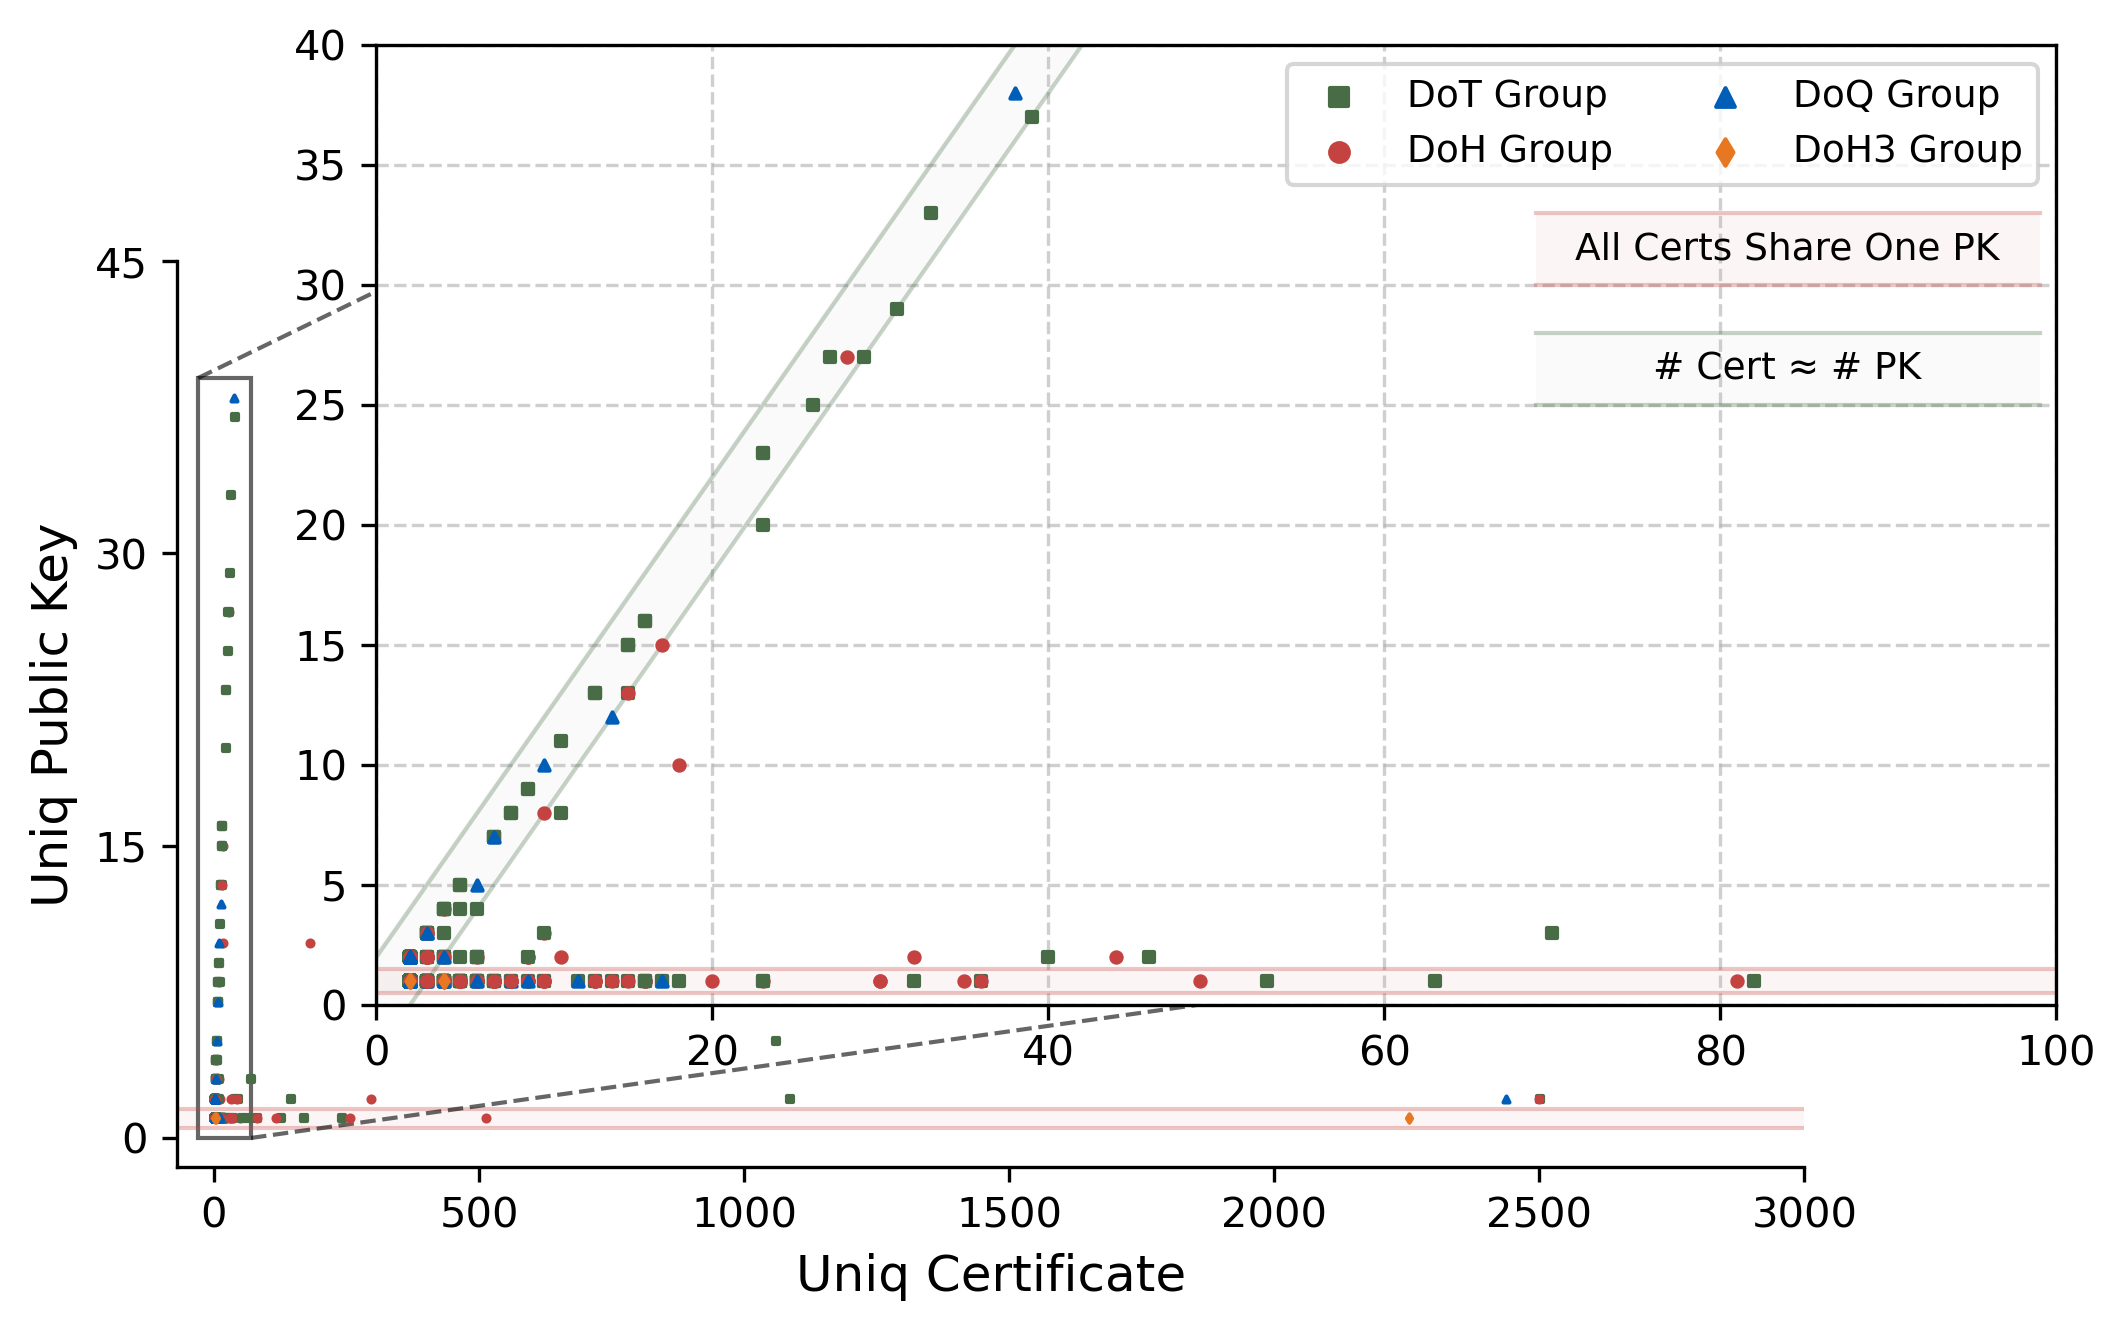

In [40]:
import random
import matplotlib.patches as mpatch
fig, ax = plt.subplots(figsize=(7,4),dpi=300)
# ax=fig.add_subplot(111)
TUMBlue="#005eb8"
TUMOrange="#e87722"
# plt.grid(linestyle = "--",alpha=0.6,zorder=0) #设置背景网格线为虚线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# share one pk 矩形
rectangles = mpatch.Rectangle((-70,0.5),3500,1,color='#c44240',linewidth=0,alpha=0.05,zorder=0)
ax.add_artist(rectangles)
plt.plot([-70,3000], [0.5,0.5],color="#c44240",linewidth=1,alpha=0.3)
plt.plot([-70,3000], [1.5,1.5],color="#c44240",linewidth=1,alpha=0.3)

plt.xlabel('Uniq Certificate',fontsize=12)
plt.ylabel('Uniq Public Key',fontsize=12)


# 放大区域 矩形
rectangles = mpatch.Rectangle((-30,0),100,39,edgecolor='black',linewidth=1,zorder=0,facecolor='white',alpha=0.6)
ax.add_artist(rectangles)

plt.plot([-30,310], [39,43.5],color="black",linestyle="--",alpha=0.6,linewidth=1)
plt.plot([70,1900], [0,7],color="black",linestyle="--",alpha=0.6,linewidth=1)

# 添加子图
label_flag = 1
inset_ax = fig.add_axes([0.22, 0.26, 0.8, 0.8],facecolor="white")
inset_ax.grid(linestyle = "--",alpha=0.6,zorder=0)

# share one pk 图例
rectangles = {'All Certs Share One PK' : mpatch.Rectangle((69,30),30,3,color='#c44240',linewidth=0,alpha=0.05,zorder=0)}
for r in rectangles:
    inset_ax.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    inset_ax.annotate(r, (cx, cy), color='black',
                fontsize=9, ha='center', va='center')

inset_ax.plot([69,99], [30,30],color="#c44240",linewidth=1,alpha=0.3)
inset_ax.plot([69,99], [33,33],color="#c44240",linewidth=1,alpha=0.3)

# no share pk 图例
rectangles = {'# Cert ≈ # PK' : mpatch.Rectangle((69,25),30,3,color='#486c46',linewidth=0,alpha=0.03,zorder=0)}
for r in rectangles:
    inset_ax.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    inset_ax.annotate(r, (cx, cy), color='black',
                fontsize=9, ha='center', va='center')

inset_ax.plot([69,99], [25,25],color="#486c46",linewidth=1,alpha=0.3)
inset_ax.plot([69,99], [28,28],color="#486c46",linewidth=1,alpha=0.3)


# 描点
for i in range(len(dot_x_list)):
    z_random = random.randint(2,7)
    if label_flag:
        ax.scatter(-100,-100,s=20,c='#486c46',marker='s',zorder=z_random,label='DoT Group')
        inset_ax.scatter(-100,-100,s=20,c='#486c46',marker='s',zorder=z_random,label='DoT Group')
        label_flag = 0
    
    ax.scatter(dot_x_list[i],dot_y_list[i],s=2,c='#486c46',marker='s',zorder=z_random)
    inset_ax.scatter(dot_x_list[i],dot_y_list[i],s=6,c='#486c46',marker='s',zorder=z_random)
    
        
    
label_flag = 1   
for i in range(len(doh_x_list)):
    z_random = random.randint(2,7)
    if label_flag:
        ax.scatter(-100,-100,s=20,c='#c44240',marker='o',zorder=z_random,label='DoH Group')
        inset_ax.scatter(-100,-100,s=20,c='#c44240',marker='o',zorder=z_random,label='DoH Group')
        label_flag = 0

    ax.scatter(doh_x_list[i],doh_y_list[i],s=2,c='#c44240',marker='o',zorder=z_random)
    inset_ax.scatter(doh_x_list[i],doh_y_list[i],s=6,c='#c44240',marker='o',zorder=z_random)
    
    
        
    
label_flag = 1  
for i in range(len(doq_x_list)):
    z_random = random.randint(6,7)
    if label_flag:
        ax.scatter(-100,-100,s=20,c=TUMBlue,marker='^',zorder=z_random,label='DoQ Group')
        inset_ax.scatter(-100,-100,s=20,c=TUMBlue,marker='^',zorder=z_random,label='DoQ Group')
        label_flag = 0
    
    ax.scatter(doq_x_list[i],doq_y_list[i],s=2,c=TUMBlue,marker='^',zorder=z_random)
    inset_ax.scatter(doq_x_list[i],doq_y_list[i],s=6,c=TUMBlue,marker='^',zorder=z_random)


    
label_flag = 1  
for i in range(len(doh3_x_list)):
    z_random = 7
    if label_flag:
        ax.scatter(-100,-100,s=20,c=TUMOrange,marker='d',zorder=z_random,label='DoH3 Group')
        inset_ax.scatter(-100,-100,s=20,c=TUMOrange,marker='d',zorder=z_random,label='DoH3 Group')
        label_flag = 0
    
    ax.scatter(doh3_x_list[i],doh3_y_list[i],s=2,c=TUMOrange,marker='d',zorder=z_random)
    inset_ax.scatter(doh3_x_list[i],doh3_y_list[i],s=5,c=TUMOrange,marker='d',zorder=z_random)
    

# 子图 share one pk 矩形
rectangles = mpatch.Rectangle((-1,0.5),110,1,color='#c44240',linewidth=0,alpha=0.05,zorder=0)
inset_ax.add_artist(rectangles)
inset_ax.plot([0,100], [0.5,0.5],color="#c44240",linewidth=1,alpha=0.3)
inset_ax.plot([0,100], [1.5,1.5],color="#c44240",linewidth=1,alpha=0.3)


# inset_ax.plot([0,16], [0,16],color="gray",linewidth=1)

# 子图 no share pk 矩形
rectangles = mpatch.Rectangle((1,-1),80,3,facecolor='#486c46',linewidth=0,alpha=0.03,zorder=0,angle=45)
inset_ax.add_artist(rectangles)
inset_ax.plot([0,38], [2,40],color="#486c46",linewidth=1,alpha=0.3)
inset_ax.plot([2,42], [0,40],color="#486c46",linewidth=1,alpha=0.3)

# inset_ax.plot([1,1], [0,16],color="gray",linewidth=1)



inset_ax.legend(fontsize=9,ncol=2)

inset_ax.set_ylim(0,40)
inset_ax.set_xlim(0,100)

ax.set_ylim(-1.5,45)
ax.set_xlim(-70,3000)
ax.set_yticks(np.arange(0,46,15))

# inset_ax.set_xlim([0,2500])
# inset_ax.set_ylim([0,0.4])
# plt.tight_layout()

plt.savefig("./fig/dox_pk_share.pdf",bbox_inches = 'tight')
plt.show()

In [222]:
share_num = 0
no_share_num = 0
all_num = 0
one_num = 0
pk_raw = doq_pk_raw
for index, value in pk_raw['group'].value_counts().iteritems():
    if value == 1:
        break
    temp_raw = pk_raw[pk_raw['group']==index]
    temp_pk_num = len(temp_raw['pk_raw_hash'].value_counts())
    all_num = all_num + 1
    if len(temp_raw) == temp_pk_num:
        no_share_num = no_share_num + 1
        
    else:
        share_num = share_num + 1
        
    if temp_pk_num == 1:
        one_num =one_num +1
        print(index,value)

print(share_num,share_num/all_num*100)
print(no_share_num,no_share_num/all_num*100)
print(one_num,one_num/all_num*100)
#     x_list.append(len(temp_raw))
#     y_list.append(temp_pk_num)

dns.adguard.com 17
.dns.stevenz.net 12
gacdrive.com 9
.adguard.ch 8
puredns.org 6
iyahaha.com  4
ecdsa.controld.com 4
unp.im 3
.lele233.com 2
.dns.noad.me 2
.vvvglass.com 2
2099.ml 2
.ipv4dns.com 2
dns.radityaharya.me 2
ads-eu.landgame.net 2
sturtz.io 2
adguard.qenisis.com 2
martensen.cloud  2
dns.tycholaz.com 2
noridev.moe 2
whax.eu.org 2
dns.hubservices.vn 2
.leadmon.net 2
d.luwei.date 2
loli.sektehalodavid.click 2
yuyz.net 2
ecdsa.controld.dev 2
31 62.0
19 38.0
27 54.0


# 弱算法 

In [6]:
dot_pk_raw["pk_algo_size"] = dot_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
dot_pk_raw['pk_algo_size'].value_counts()

b'sha256WithRSAEncryption'; 2048     8218
b'ecdsa-with-SHA384'; 256            3962
b'ecdsa-with-SHA256'; 384            3238
b'sha256WithRSAEncryption'; 4096      410
b'sha256WithRSAEncryption'; 384       327
b'sha384WithRSAEncryption'; 2048      300
b'ecdsa-with-SHA256'; 256             287
b'sha256WithRSAEncryption'; 256       280
b'sha1WithRSAEncryption'; 1024        183
b'ecdsa-with-SHA384'; 384              93
b'sha512WithRSAEncryption'; 4096       53
b'sha384WithRSAEncryption'; 4096       27
b'sha256WithRSAEncryption'; 3072       24
b'sha512WithRSAEncryption'; 2048        3
b'sha256WithRSAEncryption'; 3130        2
b'sha1WithRSAEncryption'; 2048          2
b'sha512WithRSAEncryption'; 16384       1
b'ecdsa-with-SHA512'; 4096              1
b'sha256WithRSAEncryption'; 1536        1
b'ecdsa-with-SHA512'; 521               1
b'sha256WithRSAEncryption'; 1024        1
b'ED25519'; 256                         1
Name: pk_algo_size, dtype: int64

In [256]:
327 + 280 + 183

790

In [255]:
dot_pk_raw['pk_sig_algo'].value_counts()

b'sha256WithRSAEncryption'    9263
b'ecdsa-with-SHA384'          4055
b'ecdsa-with-SHA256'          3525
b'sha384WithRSAEncryption'     327
b'sha1WithRSAEncryption'       185
b'sha512WithRSAEncryption'      57
b'ecdsa-with-SHA512'             2
b'ED25519'                       1
Name: pk_sig_algo, dtype: int64

In [270]:
dot_pk_raw['pk_sig_algo'] = dot_pk_raw['pk_sig_algo'].astype(str)
dot_pk_raw['pk_sig_algo'].value_counts()

b'sha256WithRSAEncryption'    9263
b'ecdsa-with-SHA384'          4055
b'ecdsa-with-SHA256'          3525
b'sha384WithRSAEncryption'     327
b'sha1WithRSAEncryption'       185
b'sha512WithRSAEncryption'      57
b'ecdsa-with-SHA512'             2
b'ED25519'                       1
Name: pk_sig_algo, dtype: int64

In [285]:
dot_pk_raw[(dot_pk_raw['pk_size']==1024)].subject.value_counts()

FG1K5D3I14803596; Fortinet; FortiGate;     16
FGT3HD3914801268; Fortinet; FortiGate;     13
FG100D3G12805731; Fortinet; FortiGate;     12
FG140D3G13800042; Fortinet; FortiGate;      9
FG100D3G13803215; Fortinet; FortiGate;      8
                                           ..
FG100D3G15805156; Fortinet; FortiGate;      1
FG100D3G15820074; Fortinet; FortiGate;      1
FGT5HD3915803108; Fortinet; FortiGate;      1
FGT5HD3914802040; Fortinet; FortiGate;      1
FG140P3G13800058; Fortinet; FortiGate;      1
Name: subject, Length: 72, dtype: int64

In [248]:
doh_pk_raw["pk_algo_size"] = doh_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
doh_pk_raw['pk_algo_size'].value_counts()

b'ecdsa-with-SHA384'; 256           3547
b'sha256WithRSAEncryption'; 2048    2878
b'ecdsa-with-SHA256'; 256            364
b'sha256WithRSAEncryption'; 4096     253
b'sha384WithRSAEncryption'; 2048     210
b'sha256WithRSAEncryption'; 256      201
b'sha256WithRSAEncryption'; 384       84
b'ecdsa-with-SHA384'; 384             58
b'sha384WithRSAEncryption'; 4096      12
b'ecdsa-with-SHA256'; 384              6
b'sha1WithRSAEncryption'; 2048         5
b'sha512WithRSAEncryption'; 2048       4
b'sha512WithRSAEncryption'; 4096       1
b'sha384WithRSAEncryption'; 3072       1
b'sha256WithRSAEncryption'; 3072       1
Name: pk_algo_size, dtype: int64

In [7]:
doq_pk_raw["pk_algo_size"] = doq_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
doq_pk_raw['pk_algo_size'].value_counts()

b'ecdsa-with-SHA384'; 256           2502
b'sha256WithRSAEncryption'; 2048     491
b'sha384WithRSAEncryption'; 2048     122
b'sha256WithRSAEncryption'; 256      101
b'sha256WithRSAEncryption'; 384       55
b'sha256WithRSAEncryption'; 4096      36
b'ecdsa-with-SHA256'; 256             32
b'ecdsa-with-SHA384'; 384             12
b'sha384WithRSAEncryption'; 4096       3
b'sha256WithRSAEncryption'; 3072       2
b'ecdsa-with-SHA256'; 384              2
Name: pk_algo_size, dtype: int64

In [14]:
temp = doq_pk_raw[(doq_pk_raw['pk_algo_size'].str.contains('RSA'))&((doq_pk_raw['pk_size']==384)|(doq_pk_raw['pk_size']==256))]['ip']
temp.to_csv("./hk_data/doq/pk_weak.txt",index=None)

In [8]:
doq_pk_root_raw = pd.read_csv("./hk_data/doq/scan/result_pk_root.txt")
doq_pk_root_raw["pk_algo_size"] = doq_pk_root_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
doq_pk_root_raw['pk_algo_size'].value_counts()

b'sha384WithRSAEncryption'; 384     2478
b'sha256WithRSAEncryption'; 4096     371
b'sha256WithRSAEncryption'; 2048     254
b'sha384WithRSAEncryption'; 4096      79
b'sha256WithRSAEncryption'; 3072      50
b'sha1WithRSAEncryption'; 2048        23
b'sha256WithRSAEncryption'; 384       19
b'ecdsa-with-SHA384'; 384             17
b'sha256WithRSAEncryption'; 256       13
b'sha384WithRSAEncryption'; 2048       1
b'ecdsa-with-SHA384'; 256              1
Name: pk_algo_size, dtype: int64

In [9]:
len(doq_pk_root_raw)

3306

In [250]:
doh3_pk_raw["pk_algo_size"] = doh3_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
doh3_pk_raw['pk_algo_size'].value_counts()

b'ecdsa-with-SHA384'; 256           2255
b'sha256WithRSAEncryption'; 2048       5
b'sha256WithRSAEncryption'; 384        3
b'sha384WithRSAEncryption'; 2048       1
Name: pk_algo_size, dtype: int64

In [251]:
https_pk_raw["pk_algo_size"] = https_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
https_pk_raw['pk_algo_size'].value_counts()

b'sha256WithRSAEncryption'; 2048    489799
b'ecdsa-with-SHA256'; 256           140076
b'sha256WithRSAEncryption'; 4096     52944
b'ecdsa-with-SHA384'; 256            49333
b'sha256WithRSAEncryption'; 256      12656
b'sha256WithRSAEncryption'; 384       8932
b'sha384WithRSAEncryption'; 2048      8625
b'ecdsa-with-SHA384'; 384             7521
b'sha256WithRSAEncryption'; 3072      3504
b'sha1WithRSAEncryption'; 2048        2782
b'sha1WithRSAEncryption'; 1024        1677
b'sha384WithRSAEncryption'; 4096      1353
b'md5WithRSAEncryption'; 2048         1312
b'sha256WithRSAEncryption'; 1024       394
b'sha512WithRSAEncryption'; 2048       342
b'ecdsa-with-SHA256'; 384              309
b'md5WithRSAEncryption'; 1024          198
b'sha512WithRSAEncryption'; 4096        94
b'sha1WithRSAEncryption'; 4096          92
b'sha384WithRSAEncryption'; 3072        47
b'ecdsa-with-SHA256'; 2048              23
b'sha256WithRSAEncryption'; 8192        21
b'ecdsa-with-SHA384'; 2048              16
b'sha512Wit

In [254]:
https_pk_raw['pk_sig_algo'].value_counts()

b'sha256WithRSAEncryption'    568265
b'ecdsa-with-SHA256'          140412
b'ecdsa-with-SHA384'           56870
b'sha384WithRSAEncryption'     10027
b'sha1WithRSAEncryption'        4553
b'md5WithRSAEncryption'         1519
b'sha512WithRSAEncryption'       451
b'sha1WithRSA'                     6
b'ecdsa-with-SHA512'               5
b'ecdsa-with-SHA1'                 1
Name: pk_sig_algo, dtype: int64

In [284]:
https_pk_raw[(https_pk_raw['pk_sig_algo'].str.contains('sha1'))]

,ip,pk_raw_hash,pk_size,pk_sig_algo,subject,pk_algo_size
204,kkjowki.net,f23435163603c8b9cb99e8757f535c26a7e04dbb,2048,b'sha1WithRSAEncryption',*.malware.com; Internet Widgits Pty Ltd;,b'sha1WithRSAEncryption'; 2048
299,1x2center.com,71da7260d472a4fd32457fa5dce1ef7e815889a1,2048,b'sha1WithRSAEncryption',vps.1x2center.com; Unknown; Unknown;,b'sha1WithRSAEncryption'; 2048
402,ehousechina.com,7cdbb26a73febaa11e4cf7830a03abf8c29aa4e1,2048,b'sha1WithRSAEncryption',DB1919AK0092;,b'sha1WithRSAEncryption'; 2048
430,ztgbc.com,fc687b2a463bc613b7de9779eb37f4659c8acb41,1024,b'sha1WithRSAEncryption',Vhost.zzidc.com; zzidc.com; zzidc;,b'sha1WithRSAEncryption'; 1024
484,off.li,1f869e1907a400405c1f188868fd59425ec82f59,2048,b'sha1WithRSAEncryption',Offliberty;,b'sha1WithRSAEncryption'; 2048
...,...,...,...,...,...,...
781581,zzsljx.cn,fc687b2a463bc613b7de9779eb37f4659c8acb41,1024,b'sha1WithRSAEncryption',Vhost.zzidc.com; zzidc.com; zzidc;,b'sha1WithRSAEncryption'; 1024
781610,ecosystema.ru,4f67b97e1e49b1c68040d3563cbbfaa05f2431c5,1024,b'sha1WithRSAEncryption',1245.vps.agava.net; SomeOrganization; SomeOrga...,b'sha1WithRSAEncryption'; 1024
781655,starinet.com.ua,94b1deb5b3fdffb5829987966f13b4bc1bd18556,1024,b'sha1WithRSAEncryption',starinet.com.ua; SomeOrganization; SomeOrganiz...,b'sha1WithRSAEncryption'; 1024
781915,azstaging.net,4b7ea91703338950735c629162f9f6a530876273,2048,b'sha1WithRSAEncryption',localhost; Internet Widgits Pty Ltd; section;,b'sha1WithRSAEncryption'; 2048


In [252]:
quic_pk_raw = pd.read_csv("./hk_data/top-quic/result_pk.txt")
quic_pk_raw["pk_algo_size"] = quic_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
quic_pk_raw['pk_algo_size'].value_counts()

b'ecdsa-with-SHA256'; 256           117661
b'sha256WithRSAEncryption'; 2048     44802
b'ecdsa-with-SHA384'; 256            44410
b'sha256WithRSAEncryption'; 4096      3139
b'sha256WithRSAEncryption'; 256       1396
b'sha256WithRSAEncryption'; 384       1210
b'sha384WithRSAEncryption'; 4096       792
b'sha384WithRSAEncryption'; 2048       139
b'ecdsa-with-SHA256'; 384               25
b'ecdsa-with-SHA384'; 384               18
b'sha256WithRSAEncryption'; 3072        12
b'sha512WithRSAEncryption'; 2048        11
b'sha1WithRSAEncryption'; 2048           4
b'sha1WithRSAEncryption'; 1024           1
b'sha512WithRSAEncryption'; 4096         1
Name: pk_algo_size, dtype: int64

In [253]:
http3_pk_raw = pd.read_csv("./hk_data/top-http3/result/result_pk.txt")
http3_pk_raw["pk_algo_size"] = http3_pk_raw.apply(lambda x: str(x.pk_sig_algo) + "; " + str(x.pk_size), axis=1)
http3_pk_raw['pk_algo_size'].value_counts()

b'ecdsa-with-SHA256'; 256           80963
b'sha256WithRSAEncryption'; 2048    32212
b'ecdsa-with-SHA384'; 256           28183
b'sha256WithRSAEncryption'; 4096     2953
b'sha256WithRSAEncryption'; 256      1253
b'sha256WithRSAEncryption'; 384      1134
b'sha384WithRSAEncryption'; 4096      790
b'sha384WithRSAEncryption'; 2048      119
b'ecdsa-with-SHA256'; 384              24
b'ecdsa-with-SHA384'; 384              18
b'sha256WithRSAEncryption'; 3072       11
b'sha512WithRSAEncryption'; 2048        7
b'sha1WithRSAEncryption'; 2048          4
b'sha512WithRSAEncryption'; 4096        1
b'sha1WithRSAEncryption'; 1024          1
Name: pk_algo_size, dtype: int64